In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap

**A lot of the code comes from the professor's Adaline sample code.**

In [2]:
# read Iris data set

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
#df = pd.read_csv('iris.csv', header = None)
df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [3]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [4]:
pltC = ('red', 'blue', 'green')
pltM = ('o', 'x', '*')
for i in range(0,3):
    print(IC[i], pltC[i], pltM[i])
          

Iris-setosa red o
Iris-versicolor blue x
Iris-virginica green *


In [5]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


In [6]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [7]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup color map
    colors = ('green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=pltC[cdx[idx]],
                    marker=pltM[cdx[idx]], label=IC[cdx[idx]])


In [8]:
# storing accuracies we get later on
acc = []

# Focusing on the species Iris-virginica and Iris-versicolor 6 cases using 2 features at a time

### First case: sepal length and sepal width

In [9]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
cdx = np.array([1,2])

# sepal length and sepal width indexes
fdx = np.array([0,1])

In [10]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

In [11]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

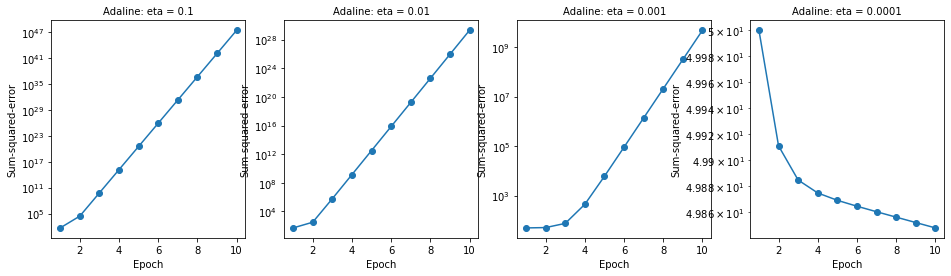

In [12]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

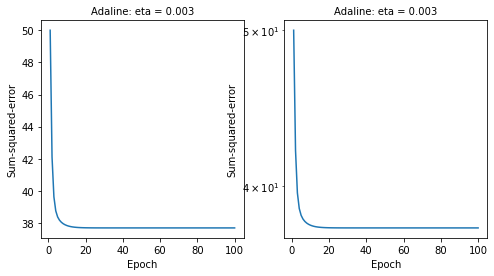

In [13]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

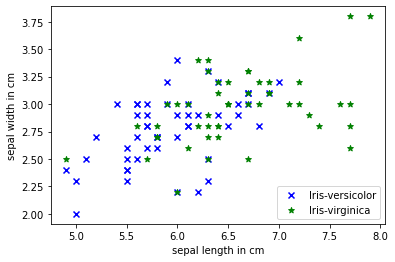

In [14]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx[0]])
plt.ylabel(IrisF[fdx[1]])
plt.legend(loc='lower right')
plt.show()

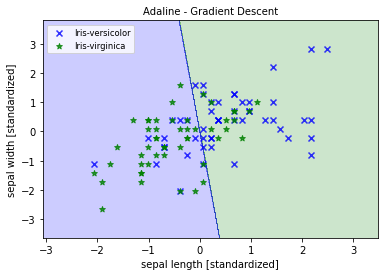

In [15]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('sepal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [16]:
acc1 = ada.accuracy(NF_Std, NC)
print(acc1)
acc.append(acc1)

0.75


### Second case: sepal length and petal length

In [17]:
# sepal length and petal length indexes
fdx2 = np.array([0,2])

In [18]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx2[0]]
        NF[j,1] = IA[i,fdx2[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx2[0]]
        NF[j,1] = IA[i,fdx2[1]]
        j += 1
    i += 1

In [19]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

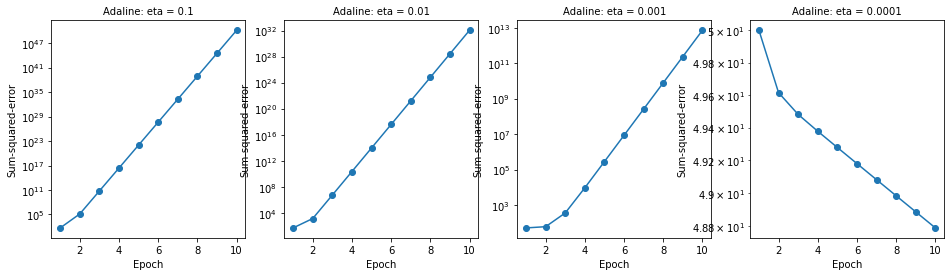

In [20]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

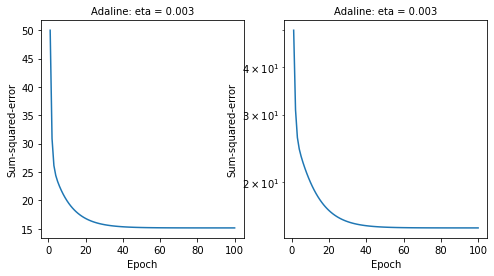

In [21]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

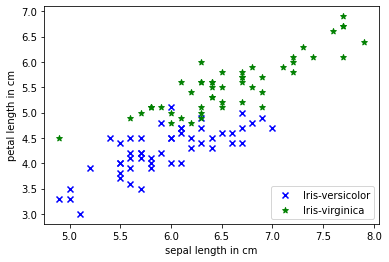

In [22]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx2[0]])
plt.ylabel(IrisF[fdx2[1]])
plt.legend(loc='lower right')
plt.show()

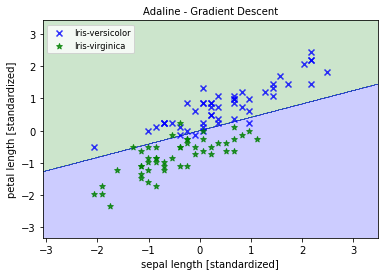

In [23]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [24]:
acc2 = ada.accuracy(NF_Std, NC)
print(acc2)
acc.append(acc2)

0.94


### Third case: sepal length and petal width

In [25]:
# sepal length and petal width indexes
fdx3 = np.array([0,3])

In [26]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx3[0]]
        NF[j,1] = IA[i,fdx3[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx3[0]]
        NF[j,1] = IA[i,fdx3[1]]
        j += 1
    i += 1

In [27]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

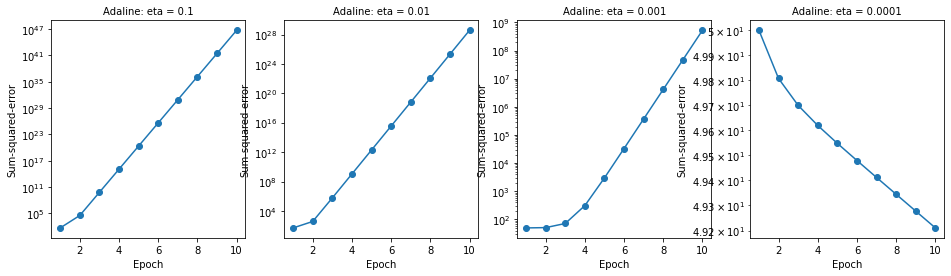

In [28]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

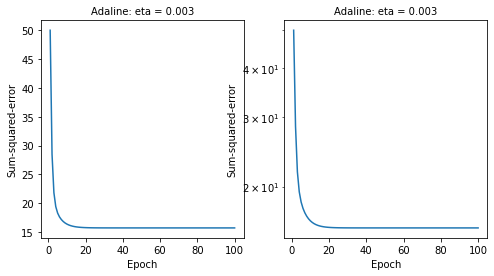

In [29]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

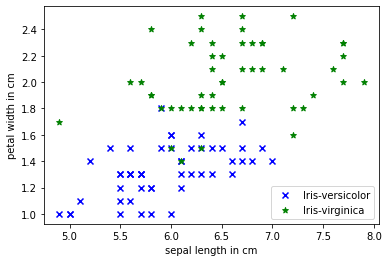

In [30]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx3[0]])
plt.ylabel(IrisF[fdx3[1]])
plt.legend(loc='lower right')
plt.show()

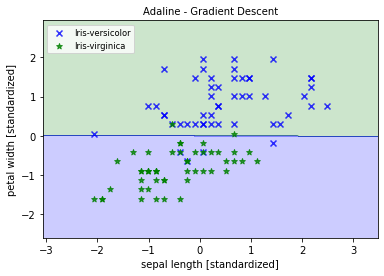

In [31]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [32]:
acc3 = ada.accuracy(NF_Std, NC)
print(acc3)
acc.append(acc3)

0.94


### Fourth Case: sepal width and petal length

In [33]:
# sepal width and petal length indexes
fdx4 = np.array([1,2])

In [34]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx4[0]]
        NF[j,1] = IA[i,fdx4[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx4[0]]
        NF[j,1] = IA[i,fdx4[1]]
        j += 1
    i += 1

In [35]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

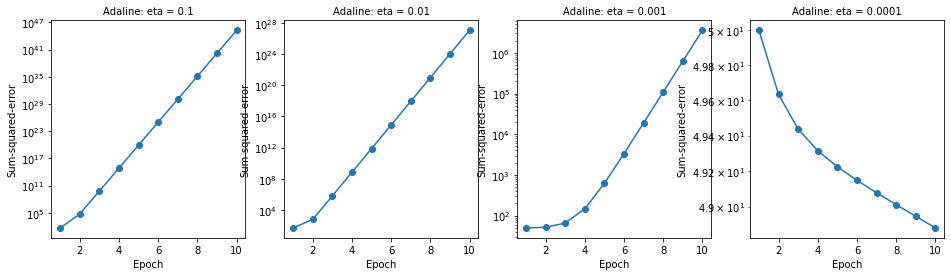

In [36]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

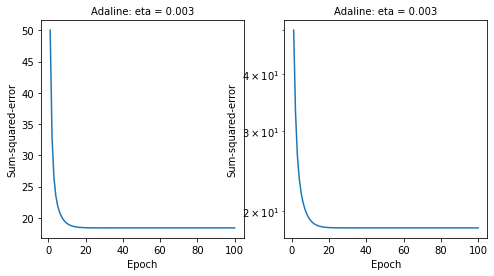

In [37]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

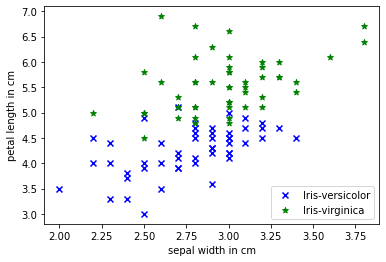

In [38]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx4[0]])
plt.ylabel(IrisF[fdx4[1]])
plt.legend(loc='lower right')
plt.show()

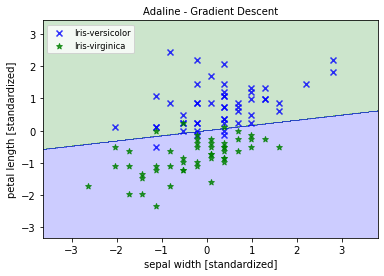

In [39]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [40]:
acc4 = ada.accuracy(NF_Std, NC)
print(acc4)
acc.append(acc4)

0.9299999999999999


### Fifth case: sepal width and petal width

In [41]:
# sepal width and petal width indexes
fdx5 = np.array([1,3])

In [42]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx5[0]]
        NF[j,1] = IA[i,fdx5[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx5[0]]
        NF[j,1] = IA[i,fdx5[1]]
        j += 1
    i += 1

In [43]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

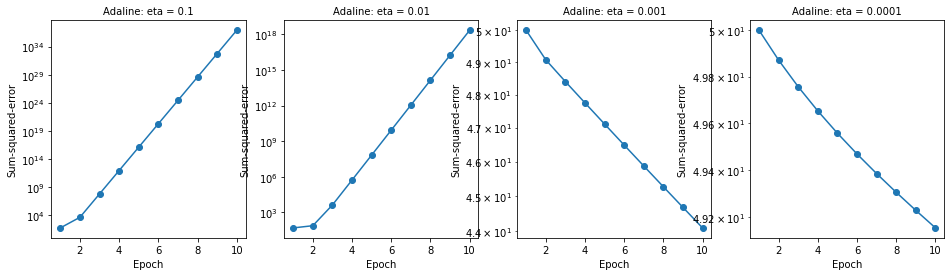

In [44]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

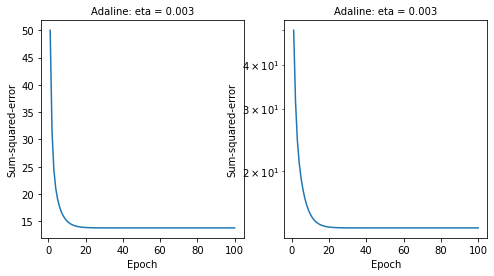

In [45]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

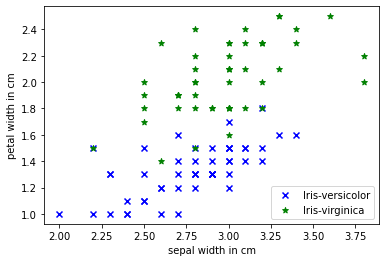

In [46]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx5[0]])
plt.ylabel(IrisF[fdx5[1]])
plt.legend(loc='lower right')
plt.show()

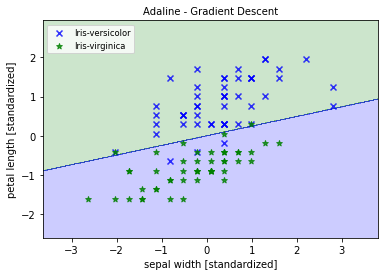

In [47]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [48]:
acc5 = ada.accuracy(NF_Std, NC)
print(acc5)
acc.append(acc5)

0.95


### Sixth case: petal length and petal width

In [49]:
# petal length and petal width indexes
fdx6 = np.array([2,3])

In [50]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx6[0]]
        NF[j,1] = IA[i,fdx6[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx6[0]]
        NF[j,1] = IA[i,fdx6[1]]
        j += 1
    i += 1

In [51]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

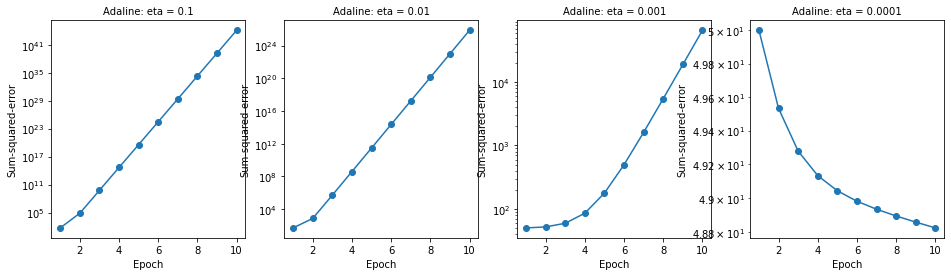

In [52]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

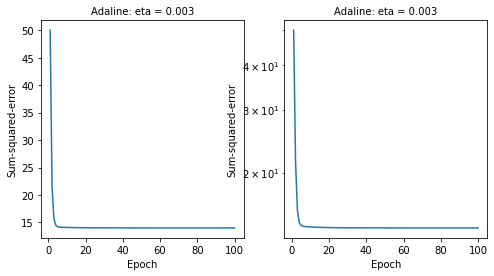

In [53]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

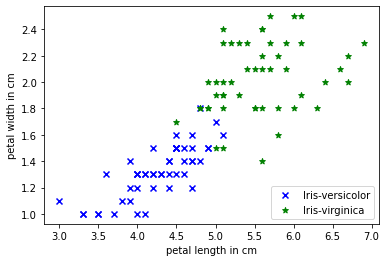

In [54]:
plt.scatter(x = NF[NC == 1, 0], y = NF[NC == 1, 1], color=pltC[cdx[0]], 
            marker=pltM[cdx[0]], label=IC[cdx[0]])
plt.scatter(x = NF[NC == -1, 0], y = NF[NC == -1, 1], color=pltC[cdx[1]], 
            marker=pltM[cdx[1]], label=IC[cdx[1]])
plt.xlabel(IrisF[fdx6[0]])
plt.ylabel(IrisF[fdx6[1]])
plt.legend(loc='lower right')
plt.show()

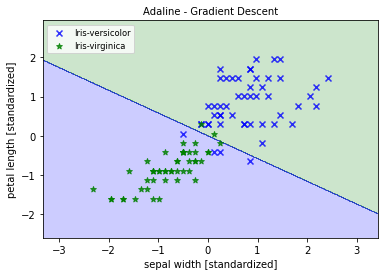

In [55]:
plot_decision_regions(NF_Std, NC, classifier = ada)
plt.title('Adaline - Gradient Descent', fontsize='medium')
plt.xlabel('sepal width [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [56]:
acc6 = ada.accuracy(NF_Std, NC)
print(acc6)
acc.append(acc6)

0.94


# Focusing on the species Iris-virginica and Iris-versicolor 4 cases using 3 features at a time

### First case: sepal length, sepal width, and petal length

In [57]:
# sepal length, sepal width, and petal length indexes
fdx7 = np.array([0,1,2])

In [58]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx7)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx7)):
            NF[j,k] = IA[i,fdx7[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx7)):
            NF[j,k] = IA[i,fdx7[k]]
        j += 1
    i += 1

In [59]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

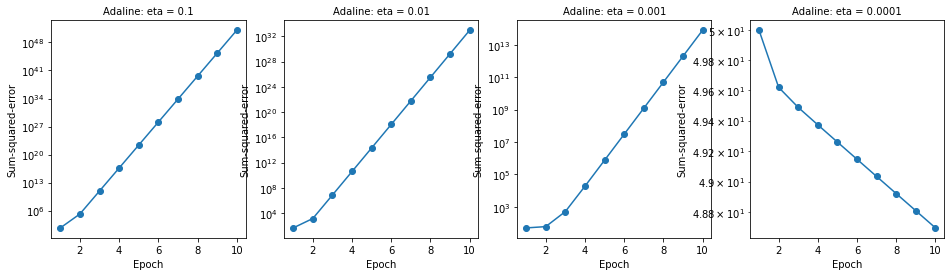

In [60]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

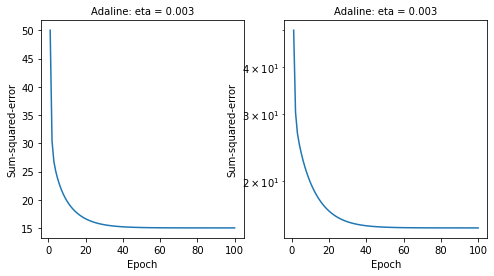

In [61]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [62]:
acc7 = ada.accuracy(NF_Std, NC)
print(acc7)
acc.append(acc7)

0.9299999999999999


### Second case: sepal length, sepal width, and petal width

In [63]:
# sepal length, sepal width, and petal width indexes
fdx8 = np.array([0,1,3])

In [64]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx8)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx8)):
            NF[j,k] = IA[i,fdx8[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx8)):
            NF[j,k] = IA[i,fdx8[k]]
        j += 1
    i += 1

In [65]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

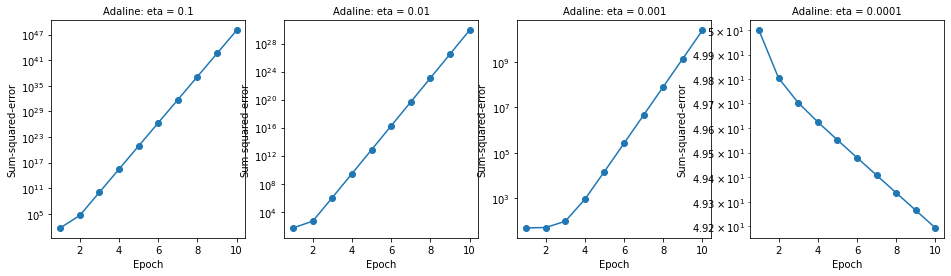

In [66]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

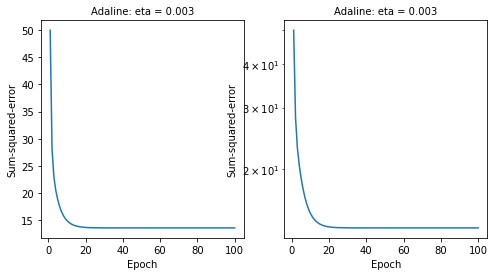

In [67]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [68]:
acc8 = ada.accuracy(NF_Std, NC)
print(acc8)
acc.append(acc8)

0.95


### Third case: sepal length, petal length, and petal width

In [69]:
# sepal length, petal length, and petal width indexes
fdx9 = np.array([0,2,3])

In [70]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx9)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx9)):
            NF[j,k] = IA[i,fdx9[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx9)):
            NF[j,k] = IA[i,fdx9[k]]
        j += 1
    i += 1

In [71]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

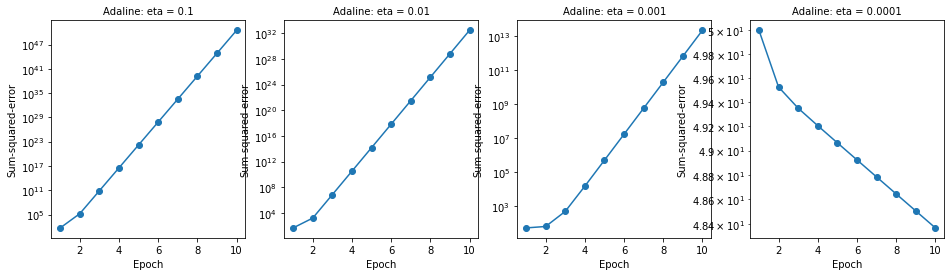

In [72]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

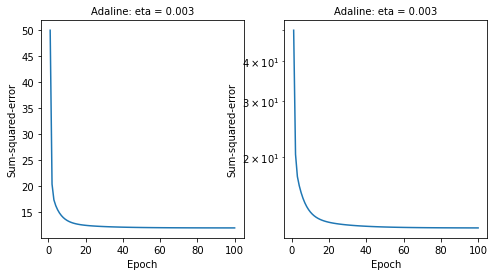

In [73]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [74]:
acc9 = ada.accuracy(NF_Std, NC)
print(acc9)
acc.append(acc9)

0.97


### Fourth case: sepal width, petal length, and petal width

In [75]:
# sepal width, petal length, and petal width indexes
fdx10 = np.array([1,2,3])

In [76]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx10)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx10)):
            NF[j,k] = IA[i,fdx10[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx10)):
            NF[j,k] = IA[i,fdx10[k]]
        j += 1
    i += 1

In [77]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()

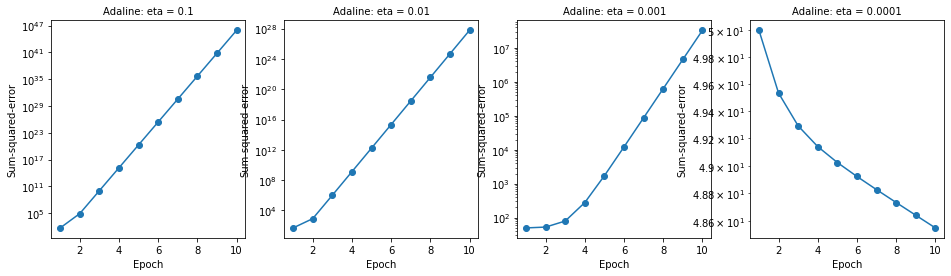

In [78]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

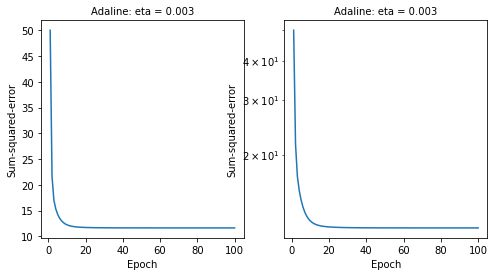

In [79]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [80]:
acc10 = ada.accuracy(NF_Std, NC)
print(acc10)
acc.append(acc10)

0.96


# Focusing on the species Iris-virginica and Iris-versicolor using all 4 features at a time

In [81]:
# sepal length, sepal width, petal length, and petal width indexes
fdx11 = np.array([0,1,2,3])

In [82]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, len(fdx11)))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        for k in range(len(fdx11)):
            NF[j,k] = IA[i,fdx11[k]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        for k in range(len(fdx11)):
            NF[j,k] = IA[i,fdx11[k]]
        j += 1
    i += 1

In [83]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()

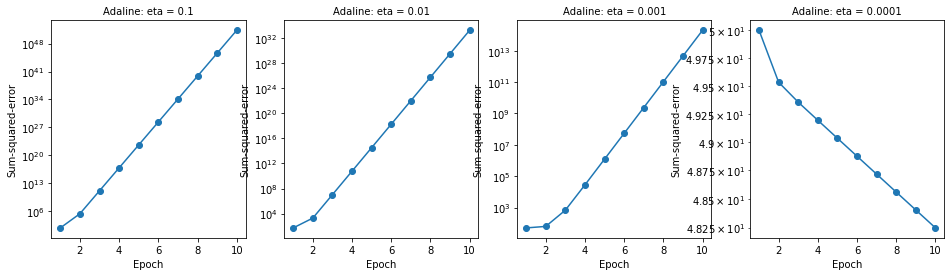

In [84]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (16,4))

ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax[0].semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.1', fontsize ='medium')


ada2 = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada2.cost_, marker = 'o')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.01', fontsize ='medium')


ada3 = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax[2].semilogy(range(1, len(ada.cost_) + 1), ada3.cost_, marker = 'o')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Sum-squared-error')
ax[2].set_title('Adaline: eta = 0.001', fontsize ='medium')


ada4 = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax[3].semilogy(range(1, len(ada.cost_) + 1), ada4.cost_, marker = 'o')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Sum-squared-error')
ax[3].set_title('Adaline: eta = 0.0001', fontsize ='medium')

plt.show()

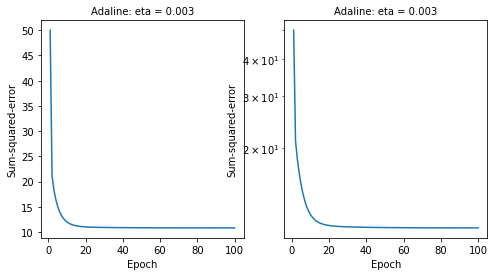

In [85]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=100, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [86]:
acc11 = ada.accuracy(NF_Std, NC)
print(acc11)
acc.append(acc11)

0.97


# RESULTS AND SUMMARY

In [87]:
# Creating a table to show results of features used.
data = acc
columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Accuracy']
df = pd.DataFrame({'Sepal Length': [1,1,1,'','','',1,1,1,'',1], 'Sepal Width': [1,'','',1,1,'',1,1,'',1,1],
                  'Petal Length': ['',1,'',1,'',1,1,'',1,1,1], 'Petal Width': ['','',1,'',1,1,'',1,1,1,1],
                  'Accuracy': data})
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Accuracy
0,1,1,,,0.75
1,1,,1,,0.94
2,1,,,1,0.94
3,,1,1,,0.93
4,,1,,1,0.95
5,,,1,1,0.94
6,1,1,1,,0.93
7,1,1,,1,0.95
8,1,,1,1,0.97
9,,1,1,1,0.96


Based on the results, it seems sepal length and sepal width has the least accuracy of 75%, while the other features that are used together have over a 90% accuracy. Ideally, the more features we have, the more the model can be trained and provide a better accuracy. As we see in the results, the best accuracy we got from the model was when we included all 4 features, giving us a 97% accuracy. 
Of course, more features doesn't guarantee us to have the best accuracy results, as shown with the sepal length and sepal width. The model was not strong in classifying the virginica and versicolor based on those two features mainly due to the fact that they might have similar lengths and widths based on the data given. The gradient descent graphs above shows this to us too, with some being classified incorrectly.